In [1]:
pip install opendata-kr -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
from opendata import dataset


dataset.download('서울시자전거')

======= 다운로드 시작 =======

data/seoul_bicycle.csv


  0%|          | 0.00/31.1M [00:00<?, ?B/s]


======= 다운로드 완료 =======


In [9]:
import pandas as pd
# 데이터셋 로드
df2 = pd.read_csv('data/seoul_bicycle.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    327231 non-null  object 
 1   대여소번호   327231 non-null  int64  
 2   대여소명    327231 non-null  object 
 3   대여구분코드  327231 non-null  object 
 4   성별      272841 non-null  object 
 5   연령대코드   327231 non-null  object 
 6   이용건수    327231 non-null  int64  
 7   운동량     327231 non-null  object 
 8   탄소량     327231 non-null  object 
 9   이동거리    327231 non-null  float64
 10  이용시간    327231 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


In [10]:
df2.head(5)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,Jan-20-2020,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,Jan-20-2020,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,Jan-20-2020,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64


In [11]:
df2.to_csv('seoul_bicycle.csv')

In [13]:
with open('seoul_bicycle.csv') as sb:
    for i in range(5):
        display(sb.readline())

',대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간\n'

'0,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75\n'

'1,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15\n'

'2,Jan-20-2020,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53\n'

'3,Jan-20-2020,5,상암센터 정비실,일일(회원),\\N,AGE_005,2,1.79,0.02,90.0,33\n'

In [7]:
import chardet

print(chardet.detect(df2.대여일자))

TypeError: Expected object of type bytes or bytearray, got: <class 'pandas.core.series.Series'>

In [300]:
df2.대여소명=df2.대여소명.astype('category')

In [302]:
df2=pd.get_dummies(df2)

In [276]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].hist(df2['운동량'])
ax[0].set_title('운동량')


ax[1].hist(df2['이동거리'])
ax[1].set_title('이동거리')

plt.show()

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [16]:
df2['대여일자']=pd.to_datetime(df2['대여일자'])

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     327231 non-null  object        
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 27.5+ MB


In [20]:
df2['대여일자'].dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
327226    2020
327227    2020
327228    2020
327229    2020
327230    2020
Name: 대여일자, Length: 327231, dtype: int64

In [23]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
# nfl_data = pd.read_csv("../input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")

# set seed for reproducibility
print(np.random.seed(0) )

None


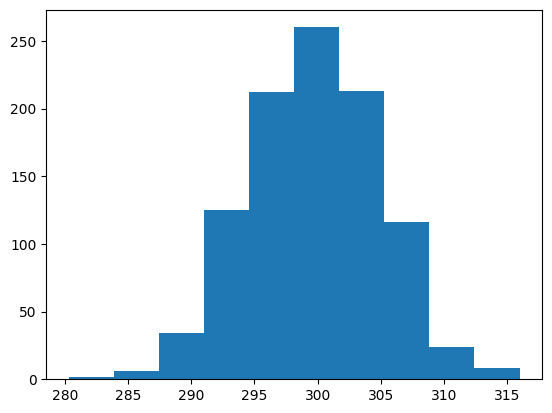

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [27]:
from scipy.stats import shapiro

In [30]:
print(shapiro(df.data))

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


In [42]:
print(shapiro(np.log1p(df.data)))

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


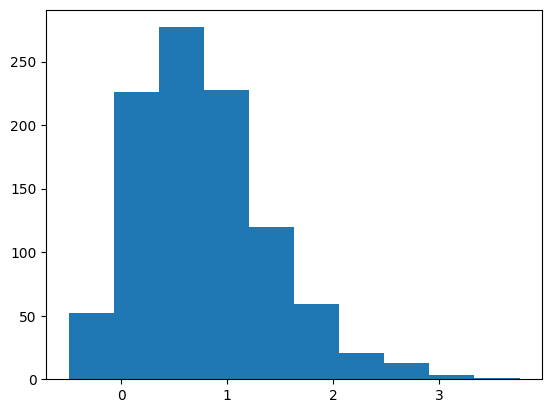

In [45]:
from scipy.stats import shapiro

import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [52]:
df_log = np.log1p(df)


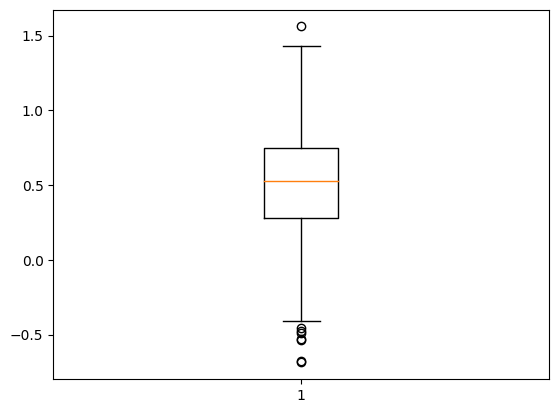

In [56]:
plt.boxplot(df_log)
plt.show()

In [57]:
print(shapiro(df_log))

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

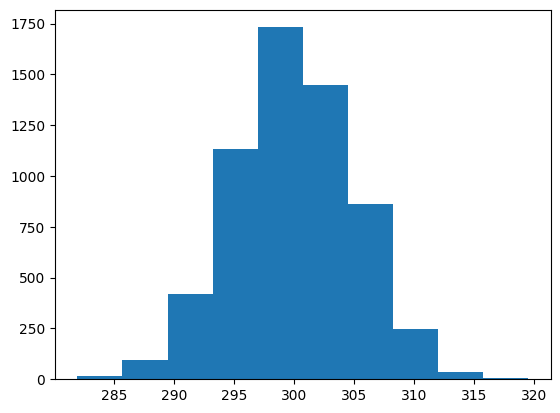

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [62]:
import scipy.stats
dir(scipy.stats)

['ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_stats_pythran',
 '_tukeylambda_stats',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'an

In [64]:
print(shapiro(df))
from scipy.stats import anderson
print(anderson(df.values))

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)
AndersonResult(statistic=array([-5997.9999614 , -5993.99988419, -5989.99980699, ...,
       17990.46303878, 17994.46311598, 17998.46319319]), critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=array([299.9598032]), scale=array([5.03180689]))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


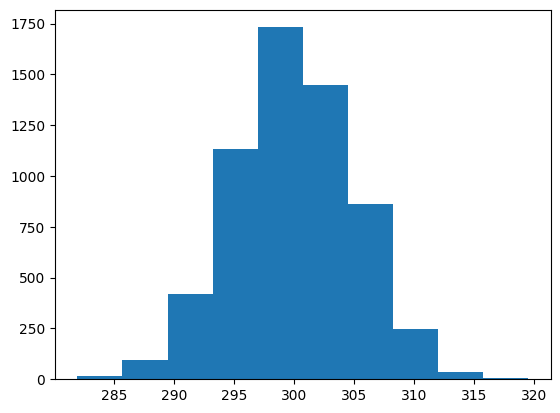

In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [71]:
help(scipy.stats.anderson)

Help on function anderson in module scipy.stats._morestats:

anderson(x, dist='norm')
    Anderson-Darling test for data coming from a particular distribution.
    
    The Anderson-Darling test tests the null hypothesis that a sample is
    drawn from a population that follows a particular distribution.
    For the Anderson-Darling test, the critical values depend on
    which distribution is being tested against.  This function works
    for normal, exponential, logistic, or Gumbel (Extreme Value
    Type I) distributions.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    dist : {'norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1'}, optional
        The type of distribution to test against.  The default is 'norm'.
        The names 'extreme1', 'gumbel_l' and 'gumbel' are synonyms for the
        same distribution.
    
    Returns
    -------
    result : AndersonResult
        An object with the following attributes:
    
 

In [77]:
df.head(5)

,data
0,296.016803
1,299.628476
2,298.232057
3,293.256749
4,301.037710


In [78]:
from scipy.stats import anderson, shapiro

print(shapiro(df))
print(anderson(df.values))

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)
AndersonResult(statistic=array([-5997.9999614 , -5993.99988419, -5989.99980699, ...,
       17990.46303878, 17994.46311598, 17998.46319319]), critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=array([299.9598032]), scale=array([5.03180689]))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
print(anderson(df.values.reshape(1,-1)[0]))


AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [80]:
df['data'].values

array([296.01680341, 299.62847649, 298.23205699, ..., 302.54242027,
       294.45614507, 301.73381948])

In [97]:
df.values.reshape(1,-1)

array([[296.01680341, 299.62847649, 298.23205699, ..., 302.54242027,
        294.45614507, 301.73381948]])

In [100]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

In [102]:
df.shape

(100, 1)

In [103]:
print(shapiro(df))

ShapiroResult(statistic=0.9872668981552124, pvalue=0.4558176100254059)


In [104]:
from scipy.stats import ttest_1samp

In [105]:
print(ttest_1samp(df,165))

TtestResult(statistic=array([3.2017885]), pvalue=array([0.00183672]), df=array([99]))


In [106]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [107]:
A = df[df['class']=='A']
B = df[df['class']=='B']

In [108]:
dir (scipy.stats) 

['ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_stats_pythran',
 '_tukeylambda_stats',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'an

In [111]:
from scipy.stats import fisher_exact, fligner, levene

print(shapiro(A['score']))
print(shapiro(B['score']))

ShapiroResult(statistic=0.9538977146148682, pvalue=4.097050521068013e-08)
ShapiroResult(statistic=0.9422046542167664, pvalue=1.1735706948456937e-06)


In [113]:

print(fligner(A['score'],B['score']))

print(levene(A['score'],B['score']))


FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)


In [114]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [115]:
A = df[df['class']=='A']
B = df[df['class']=='B']

In [117]:
print(shapiro(A['score']))
print(shapiro(B['score']))

ShapiroResult(statistic=0.9444763660430908, pvalue=3.3300091573096324e-09)
ShapiroResult(statistic=0.9614471197128296, pvalue=7.400245522148907e-05)


In [118]:
print(fligner(A['score'],B['score']))

print(levene(A['score'],B['score']))

FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)


In [119]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [120]:
A = df['A']
B = df['B']

In [121]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.964852511882782, pvalue=0.00016999404761008918)
ShapiroResult(statistic=0.9371628165245056, pvalue=4.4986816760683723e-07)


In [122]:
print(levene(A,B))
print(fligner(A,B))

LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)


In [123]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [127]:
A = df['A']
B = df['B'].fillna(df['B'].mean())

In [128]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9170354008674622, pvalue=7.811895227916033e-12)


In [129]:
print(levene(A,B))
print(fligner(A,B))

LeveneResult(statistic=107.46107010644943, pvalue=2.872706047548247e-23)
FlignerResult(statistic=81.89264702870489, pvalue=1.4368285314656846e-19)


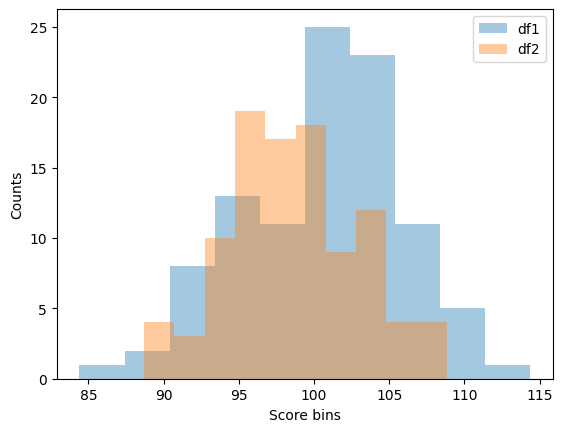

In [277]:
import pandas as pd 
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

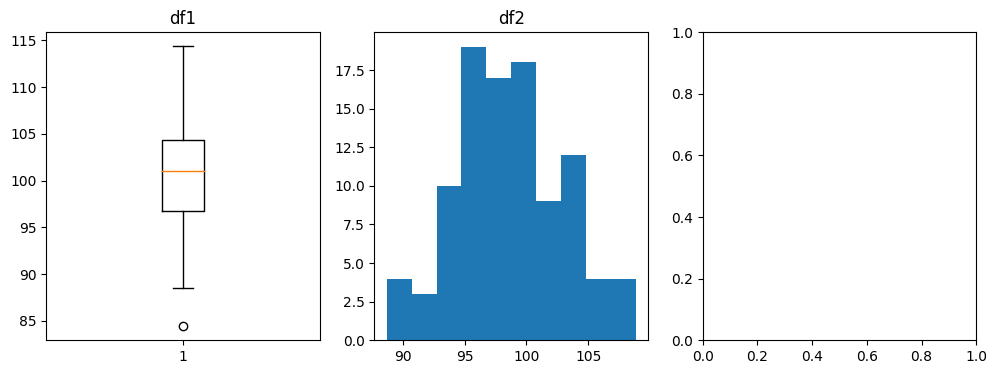

In [279]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].boxplot(df1)
ax[0].set_title('df1')


ax[1].hist(df2)
ax[1].set_title('df2')

plt.show()

In [133]:
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)


In [134]:
from scipy.stats import ttest_ind

In [135]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which

In [144]:
df1.values[:,0]

array([105.40845765, 108.72261808,  84.39863439, 100.51081647,
       100.96594909, 105.45667967, 107.69768963,  94.80175764,
        96.11898368, 114.37908704, 102.08921077,  99.90603186,
        97.26374976,  95.19936842,  93.47276883, 105.16086974,
        96.53547985,  94.07103035, 101.02290443, 105.55763457,
        99.06024133, 103.96816748, 106.49869688, 103.25233823,
       105.11671249, 106.52316714, 104.7171334 , 109.31571775,
        92.6695503 , 105.45823653, 103.10739042,  92.65757594,
       105.17619172,  93.49120405, 105.06049533, 107.8769876 ,
       100.250748  , 104.28319086, 100.56659661, 106.83025335,
       101.29201209,  98.65049162,  99.81904107,  98.00045205,
       104.90282785,  99.31683942, 102.8710963 , 104.48910436,
       100.87476148, 110.68100947,  95.34973308, 102.62869175,
        93.02007031, 102.90065989, 100.68418243, 102.6381788 ,
       103.05255071,  88.85765681,  88.44388782, 108.40858901,
       102.10743771,  99.81378751,  92.35639706,  96.25

In [145]:
print(levene(df1.values[:,0], df2.values[:,0]))
print(fligner(df1.values[:,0], df2.values[:,0]))

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
FlignerResult(statistic=2.107582676566027, pvalue=0.14657068909613508)


In [146]:
print(ttest_ind(df1,df2,equal_var=True))

Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))


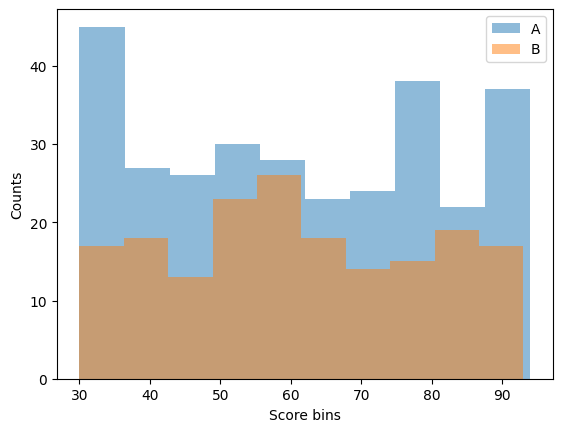

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [154]:
A = df['A']
B = df['B'].fillna(df['B'].mean())

In [152]:
df['B'].fillna(df['B'].mean())

0      30.00
1      59.00
2      69.00
3      88.00
4      68.00
       ...  
295    61.15
296    61.15
297    61.15
298    61.15
299    61.15
Name: B, Length: 300, dtype: float64

In [155]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9170354008674622, pvalue=7.811895227916033e-12)


In [156]:
from scipy.stats import wilcoxon

In [157]:
help(wilcoxon)

Help on function wilcoxon in module scipy.stats._morestats:

wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', *, axis=0, nan_policy='propagate', keepdims=False)
    Calculate the Wilcoxon signed-rank test.
    
    The Wilcoxon signed-rank test tests the null hypothesis that two
    related paired samples come from the same distribution. In particular,
    it tests whether the distribution of the differences ``x - y`` is symmetric
    about zero. It is a non-parametric version of the paired T-test.
    
    Parameters
    ----------
    x : array_like
        Either the first set of measurements (in which case ``y`` is the second
        set of measurements), or the differences between two sets of
        measurements (in which case ``y`` is not to be specified.)  Must be
        one-dimensional.
    y : array_like, optional
        Either the second set of measurements (if ``x`` is the first set of
        measurements), or not specif

In [158]:
print(wilcoxon(A,B))

WilcoxonResult(statistic=21779.5, pvalue=0.8928586509493914)


In [159]:
print(ttest_ind(A,B,equal_var=True))

Ttest_indResult(statistic=0.0858859046190923, pvalue=0.9315858640410586)


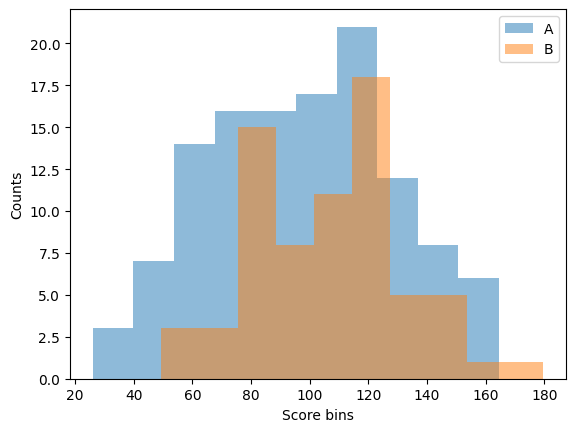

In [160]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [166]:
A = df[df['group'] =='a']['data']
B = df[df['group'] =='b']['data']

In [168]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)


In [169]:
print(levene(A,B))
print(fligner(A,B))

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)
FlignerResult(statistic=6.116095465056764, pvalue=0.01339563676982482)


In [171]:
import scipy.stats
dir(scipy.stats)

['ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_stats_pythran',
 '_tukeylambda_stats',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'an

In [183]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which

In [180]:
from scipy.stats import ranksums, mannwhitneyu, wilcoxon, ttest_1samp, ttest_ind, ttest_rel

In [178]:
print(A.shape)
print(B.shape)

(120,)
(70,)


In [179]:
print(ranksums(A,B))
print(mannwhitneyu(A,B))
# print(wilcoxon(A,B))

RanksumsResult(statistic=-2.012853238579464, pvalue=0.04413007118545221)
MannwhitneyuResult(statistic=3464.0, pvalue=0.044273981871153875)


In [184]:
print(ttest_ind(A,B,equal_var=False))

Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898)


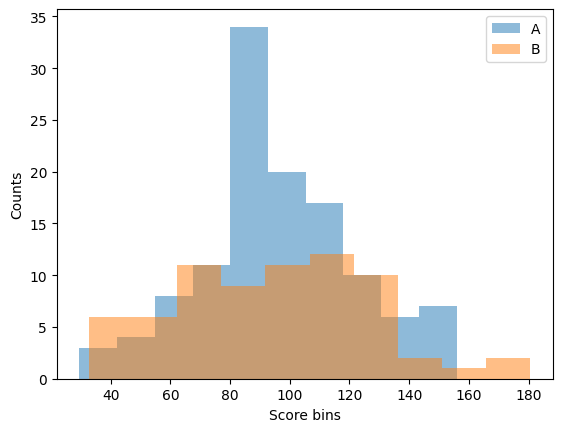

In [185]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [187]:
print(shapiro(df['a']))
print(shapiro(df['b'].dropna()))

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)


In [189]:
print(levene(df['a'],df['b'].dropna() ))
print(fligner(df['a'],df['b'].dropna() ))

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)
FlignerResult(statistic=4.387886502894593, pvalue=0.03619515515941132)


In [191]:
print(ttest_ind(df['a'],df['b'].dropna(), equal_var=False))

Ttest_indResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704)


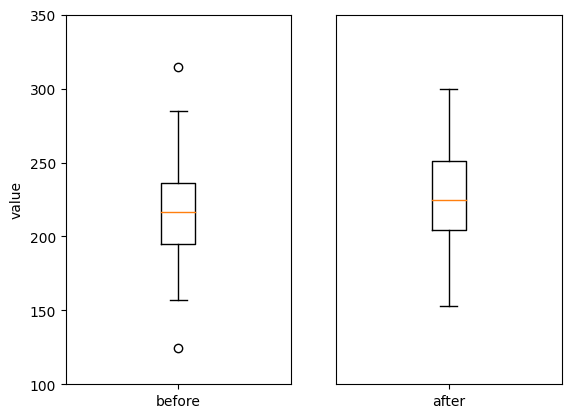

In [192]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [195]:
A = df['after']
B = df['before']

In [196]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)
ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)


In [197]:
print(levene(A,B))
print(fligner(A,B))

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)
FlignerResult(statistic=0.08084320671002646, pvalue=0.7761579588763045)


In [199]:
help(ttest_rel)

Help on function ttest_rel in module scipy.stats._stats_py:

ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the t-test on TWO RELATED samples of scores, a and b.
    
    This is a test for the null hypothesis that two related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.
        
        - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
          which the  statistic is computed, the

In [200]:
print(ttest_rel(A,B))

TtestResult(statistic=2.5535473487670677, pvalue=0.011926744724546513, df=119)


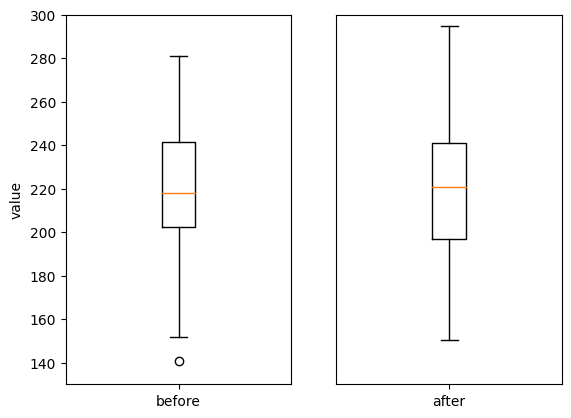

In [201]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [203]:
A = df['after']
B = df['before']

In [204]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)
ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)


In [205]:
print(ttest_rel(A,B))

TtestResult(statistic=-0.188900575991026, pvalue=0.8504925317234707, df=119)


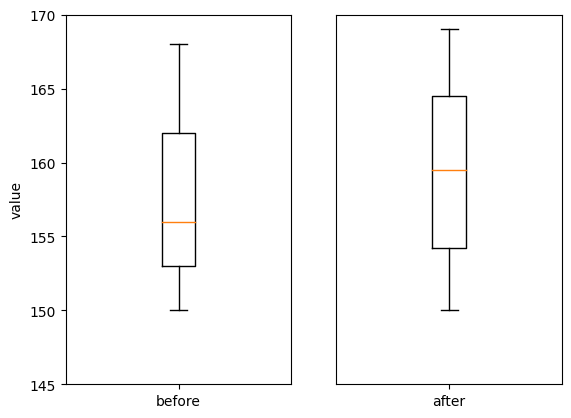

In [206]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [208]:
A = df['after']
B = df['before']

In [209]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)
ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)


In [210]:
print(ttest_rel(A,B))

TtestResult(statistic=2.187138399865287, pvalue=0.03353471744538162, df=49)


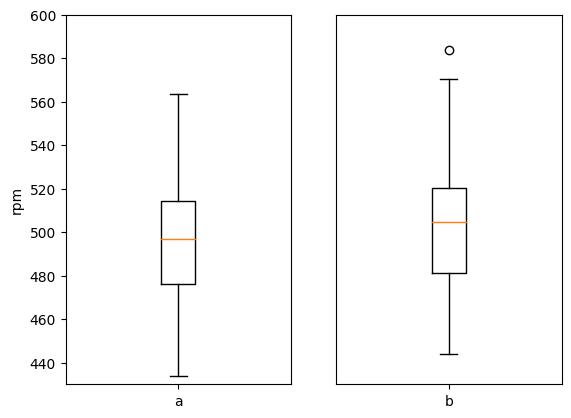

In [211]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [212]:
df

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a
...,...,...
135,508.802475,b
136,485.981627,b
137,499.289525,b
138,520.895380,b


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rpm     140 non-null    float64
 1   group   140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [217]:
A = df[df['group']=='a']['rpm']
B = df[df['group']=='b']['rpm']

In [218]:
print(shapiro(A))
print(shapiro(B))

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)


In [219]:
print(levene(A,B))
print(fligner(A,B))

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)
FlignerResult(statistic=0.054960211155456414, pvalue=0.8146465578736366)


In [224]:
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then its length along
        `axis` must equal 1, and it must otherwise be broadcastable with `a`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.


In [225]:
print(ttest_rel(A,B))

TtestResult(statistic=-1.9018108294460812, pvalue=0.06137132692892943, df=69)


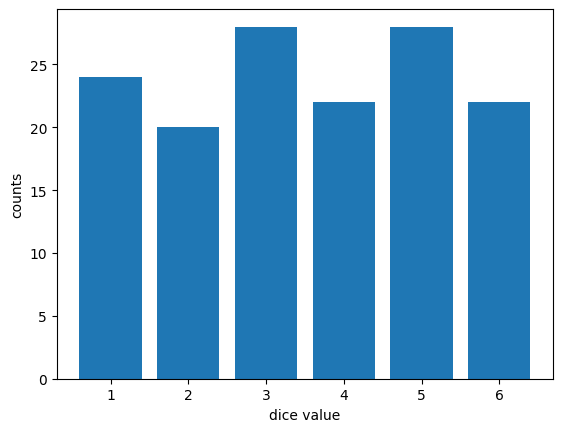

In [226]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [227]:
from scipy.stats import chi2_contingency, chisquare, fisher_exact

In [229]:
help(chisquare)

Help on function chisquare in module scipy.stats._stats_py:

chisquare(f_obs, f_exp=None, ddof=0, axis=0)
    Calculate a one-way chi-square test.
    
    The chi-square test tests the null hypothesis that the categorical data
    has the given frequencies.
    
    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category.  By default the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` degrees of freedom, where `k`
        is the number of observed frequencies.  The default value of `ddof`
        is 0.
    axis : int or None, optional
        The axis of the broadcast result of `f_obs` and `f_exp` along which to
        apply the test.  If axis is None, al

In [232]:
df['counts'].sum()/6

24.0

In [234]:
print(chisquare(df['counts'],df['counts'].sum()/6))

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


In [235]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [244]:
r=df[df['hands']=='right'].count()[0]
l=df[df['hands']=='left'].count()[0]
total = r + l
R = total * 0.8
L = total * 0.2

In [245]:
print(chisquare([r,l], [R,L]))

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


In [246]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [247]:
A = df['측정회원성별']
B = df['등급']

In [248]:
A

0        M
1        F
2        M
3        M
4        M
        ..
13391    M
13392    M
13393    M
13394    M
13395    M
Name: 측정회원성별, Length: 13396, dtype: object

In [249]:
help(chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [252]:
C = pd.crosstab(A,B)
display(A,B)

0        M
1        F
2        M
3        M
4        M
        ..
13391    M
13392    M
13393    M
13394    M
13395    M
Name: 측정회원성별, Length: 13396, dtype: object

0        C
1        B
2        B
3        A
4        C
        ..
13391    C
13392    C
13393    B
13394    B
13395    A
Name: 등급, Length: 13396, dtype: object

In [253]:
print(chi2_contingency(C))

Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))


In [254]:
cdf = pd.crosstab(df['측정회원성별'],df['등급'])
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)


등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26


In [255]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [258]:
df=df.drop('총합')

In [259]:
df=df.drop('총합', axis=1)
df

,불참,참석
남성,4,2
여성,1,9


In [260]:
print(chi2_contingency(df))

Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))


In [261]:
import seaborn as sns
import pandas as pd
sns.get_dataset_names()
df = sns.load_dataset('car_crashes')

In [262]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [265]:
df['alcohol'].sort_values(ascending=False)[:10]

34    10.038
40     9.799
26     9.416
43     7.372
11     7.175
18     6.765
48     6.664
41     6.402
3      5.824
36     5.771
Name: alcohol, dtype: float64

In [269]:
df[df['speeding']>=7]['alcohol'].mean()

6.8566

In [270]:
A = [1,2,3,4,5]
A.find(1)

AttributeError: 'list' object has no attribute 'find'

In [272]:
B = pd.DataFrame(A)

In [273]:
B.std

<bound method NDFrame._add_numeric_operations.<locals>.std of    0
0  1
1  2
2  3
3  4
4  5>

In [274]:
help(pd.DataFrame.std)

Help on function std in module pandas.core.generic:

std(self, axis=None, skipna=True, level=None, ddof=1, numeric_only=None, **kwargs)
    Return sample standard deviation over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        For `Series` this parameter is unused and defaults to 0.
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    
        .. deprecated:: 1.3.0
            The level keyword is deprecated. Use groupby instead.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default None
  

In [280]:
a = ['', 1, 2, 3, 4]
a.replace()

AttributeError: 'list' object has no attribute 'replace'

In [281]:
a = [1,2,3]
b = [1,2,3]

if a == b :
    print('True')

True


In [282]:
for i in range(10):
    if i % 2 ==0:
        i -= 1
    print(i)

-1
1
1
3
3
5
5
7
7
9


In [283]:
a

[1, 2, 3]

In [284]:
a.pop()

3

In [285]:
a

[1, 2]

In [287]:
a = [1,2,3,4,5]
r = [1,3]
a[1:3] = [7,8]

In [288]:
a

[1, 7, 8, 4, 5]

In [289]:
a

[1, 7, 8, 4, 5]

In [290]:
a[:3]

[1, 7, 8]

In [291]:
a[3:]

[4, 5]

In [294]:
import pandas as pd
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 

In [303]:
a=[]
print(len(a))

0


In [305]:
a=[1,2,3,4,5]

a[4]

5

In [307]:
import random

answer = random.randint(1, 100)
count = 0

while True:
    count += 1
    guess = int(input("숫자를 입력하세요: "))

    if guess == answer:
        print("정답입니다! {}번 만에 맞췄습니다.".format(count))
        break
    elif guess > answer:
        print("숫자가 너무 큽니다.")
    else:
        print("숫자가 너무 작습니다.")


숫자가 너무 작습니다.
숫자가 너무 작습니다.
숫자가 너무 작습니다.
숫자가 너무 작습니다.
숫자가 너무 큽니다.
숫자가 너무 작습니다.
숫자가 너무 큽니다.
숫자가 너무 작습니다.
숫자가 너무 작습니다.
정답입니다! 10번 만에 맞췄습니다.


In [309]:
a=[[1,2,3],[4,5,6],[7,8,9]]

print(a[0][2])
print(a[1][0])

3
4


In [312]:
for i in range(5):
    print(i)

0
1
2
3
4


In [313]:
a= "x..x.x..x"

In [317]:
print(a.split('.'))

['x', '', 'x', 'x', '', 'x']


In [328]:
from gtts import gTTS
from playsound import playsound
import os

# 한글 텍스트를 입력받습니다.
# txt = input("한글 텍스트를 입력하세요: ")
txt = "한글 텍스트를 입력하세요: "

# 한글 텍스트를 구글 TTS 엔진을 사용해서 음성으로 변환하고, MP3 파일이 아닌 메모리에 저장합니다.
tts = gTTS(text=txt, lang="ko")

# 바로 음성으로 변환된 오디오 데이터를 불러옵니다.
# 이 때, 인코딩 방식을 바이트로 설정하여 오디오 파일의 언어 인식 문제를 해결합니다.
audio_data = tts.get_audio_data()

# 불러온 오디오 데이터를 바로 재생합니다.
# 인코딩 방식을 바이너리(binary)로 설정합니다.
with open('output.mp3','wb') as f:
    f.write(audio_data)
playsound('output.mp3')
os.remove('output.mp3')
# 오디오 재생이 종료될 때까지 윈도우 창이 유지됩니다.


AttributeError: 'gTTS' object has no attribute 'get_audio_data'

In [329]:
from gtts import gTTS
from playsound import playsound
import os

# 한글 텍스트를 입력받습니다.
# txt = input("한글 텍스트를 입력하세요: ")
txt = "한글 텍스트를 입력하세요"

# 한글 텍스트를 구글 TTS 엔진을 사용해서 음성으로 변환하고, MP3 파일이 아닌 메모리에 저장합니다.
tts = gTTS(text=txt, lang="ko")

# 바로 음성으로 변환된 오디오 데이터를 불러옵니다.
# 이 때, 인코딩 방식을 바이트로 설정하여 오디오 파일의 언어 인식 문제를 해결합니다.
audio_data = tts.get_audio_data()

# 불러온 오디오 데이터를 바로 재생합니다.
# 인코딩 방식을 바이너리(binary)로 설정합니다.
with open('output.mp3','wb') as f:
    f.write(audio_data)
playsound('output.mp3')
os.remove('output.mp3')
# 오디오 재생이 종료될 때까지 윈도우 창이 유지됩니다.


AttributeError: 'gTTS' object has no attribute 'get_audio_data'

In [340]:
import io
from gtts import gTTS
from pydub import AudioSegment
from pydub.playback import play

# 한글 텍스트를 입력받습니다.
# txt = input("한글 텍스트를 입력하세요: ")
txt = "한글 텍스트를 입력하세요"

# 한글 텍스트를 구글 TTS 엔진을 사용해서 음성으로 변환합니다.
tts = gTTS(text=txt, lang="ko")

# 바로 음성으로 변환된 오디오 데이터를 가져옵니다.
audio_data = io.BytesIO()
tts.write_to_fp(audio_data)

# 오디오 데이터를 pydub 의 AudioSegment 객체로 변환합니다.
audio_segment = AudioSegment.from_file(io.BytesIO(audio_data.getvalue()), format="mp3")

# 재생합니다.
play(audio_segment)




/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'ffprobe'

In [345]:
import pyttsx3
engine = pyttsx3.init()
engine.setProperty('rate',150)

def speak(text):
    engine.say(text)
    engine.runAndWait()
    
text = "데이터를 입력 해 주세요. "
speak(text)

AttributeError: 'super' object has no attribute 'init'

In [349]:
import qrcode
from PIL import Image

# QR 코드를 생성할 데이터를 입력합니다.
data = "phone : 010-3245-1234 baw"

# QR 코드를 생성합니다.
qr = qrcode.QRCode(version=1, box_size=10, border=5)
qr.add_data(data)
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")

# QR 코드를 이미지 파일로 저장합니다.
# img.save("qrcode.png")

# QR 코드를 출력합니다.
img.show()


In [1]:
import psutil
import tkinter as tk
from tkinter import ttk

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        
        # 창 초기화
        self.title("CPU & RAM 사용량 모니터링")
        self.geometry("400x200")
        
        # 라벨 초기화
        self.cpu_label = ttk.Label(self, text="CPU 사용량: %", font=("TkDefaultFont",20))
        self.cpu_label.pack(pady=10)
        self.ram_label = ttk.Label(self, text="RAM 사용량: %", font=("TkDefaultFont",20))
        self.ram_label.pack(pady=10)

        # 1초마다 사용량 정보 업데이트
        self.update_state()
        
    def update_state(self):
        # CPU, RAM 사용량 정보를 받아옴
        cpu_percent = psutil.cpu_percent()
        ram_percent = psutil.virtual_memory().percent

        # 라벨에 사용량 정보 반영
        self.cpu_label.configure(text=f"CPU 사용량: {cpu_percent}%")
        self.ram_label.configure(text=f"RAM 사용량: {ram_percent}%")

        # 1초 후에도 사용량 정보 업데이트
        self.after(1000, self.update_state)

if __name__ == "__main__":
    app = App()
    app.mainloop()


In [1]:
import tkinter as tk


class Converter:
    def __init__(self, parent):
        # 윈도우 생성
        self.window = parent
        self.window.title("단위 변환기")
        self.window.resizable(False, False)

        # 각각 1m, 1km, 1ft, 1yd, 1mile의 값을 저장해 놓습니다.
        self.conversion_table = {"length": {"m": 1.0, "km": 0.001, "ft": 3.2808, "yd": 1.0936, "mile": 0.000621371},
                                 "weight": {"kg": 1.0, "g": 1000.0, "lb": 2.20462, "oz": 35.274},
                                 "temperature": {"C": 1.0, "F": 33.8, "K": 274.15}}

        # 각각 길이, 무게, 온도 종류를 저장합니다.
        self.categories = list(self.conversion_table.keys())

        # 선택한 카테고리와 단위를 저장합니다.
        self.selected_category = tk.StringVar()
        self.selected_unit = tk.StringVar()

        # 기본값으로 "length"를 선택합니다.
        self.selected_category.set(self.categories[0])

        # 라벨 생성
        tk.Label(self.window, text="변환할 단위의 종류를 선택하십시오.").grid(row=0, column=0, columnspan=2, pady=10)

        tk.Label(self.window, text="카테고리:").grid(row=1, column=0)
        tk.Label(self.window, text="단위:").grid(row=2, column=0)

        # 카테고리와 단위 선택 콤보박스 생성
        tk.OptionMenu(self.window, self.selected_category, *self.categories, command=self.update_unit).grid(row=1, column=1)
        tk.OptionMenu(self.window, self.selected_unit, "", command=self.convert).grid(row=2, column=1)

        # 변환할 수 입력받는 엔트리 생성
        tk.Label(self.window, text="변환할 수를 입력하십시오.").grid(row=3, column=0, columnspan=2, pady=10)
        self.input_entry = tk.Entry(self.window)
        self.input_entry.grid(row=4, column=0, columnspan=2, padx=10)

        # 결과값을 출력할 라벨 생성
        tk.Label(self.window, text="결과:").grid(row=5, column=0, pady=10)
        self.result_label = tk.Label(self.window, text="")
        self.result_label.grid(row=5, column=1)

    def update_unit(self, category):
        # 선택한 카테고리에 해당하는 단위들을 갱신합니다.
        units = list(self.conversion_table[category].keys())

        # 기존 단위를 삭제하고 새로운 단위를 추가합니다.
        self.selected_unit.set("")
        menu = self.selected_unit["menu"]
        menu.delete(0, "end")
        for unit in units:
            menu.add_command(label=unit, command=tk._setit(self.selected_unit, unit))

    def convert(self, unit):
        # 변환이 가능한 경우, 변환 결과를 계산하여 출력합니다.
        try:
            val = float(self.input_entry.get())
            category = self.selected_category.get()
            unit_from = self.selected_unit.get()
            unit_to = "C" if category == "temperature" else [u for u in self.conversion_table[category].keys() if u != unit_from][0]
            ratio = self.conversion_table[category][unit_from] / self.conversion_table[category][unit_to]
            result = ratio * val
            self.result_label["text"] = "{} {}는 {:.2f} {}입니다.".format(val, unit_from, result, unit_to)
        except:
            # 변환이 불가능한 경우, 에러 메시지를 출력합니다.
            self.result_label["text"] = "올바른 값을 입력하십시오."


if __name__ == "__main__":
    # 윈도우 생성
    root = tk.Tk()
    converter = Converter(root)

    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/Users/macbook/anaconda3/lib/python3.10/tkinter/__init__.py", line 3987, in __call__
    self.__callback(self.__value, *args)
  File "/var/folders/yy/lm16dbfs7d9czs9lgwns9jvh0000gn/T/ipykernel_97089/17380535.py", line 52, in update_unit
    menu = self.selected_unit["menu"]
TypeError: 'StringVar' object is not subscriptable
2023-05-23 18:36:44.312 python[97089:8710580] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/Users/macbook/anaconda3/lib/python3.10/tkinter/__init__.py", line 3987, in __call__
    self.__callback(self.__value, *args)
  File "/var/folders/yy/

: 

In [25]:
import gdown

gdown.download('https://bit.ly/3q9SZix', '20s_best_book.json', quiet=False)

Downloading...
From: https://bit.ly/3q9SZix
To: /Users/macbook/Test/20s_best_book.json
100%|██████████| 92.9k/92.9k [00:00<00:00, 950kB/s]


'20s_best_book.json'

In [27]:
import pandas as pd

df = pd.read_json('20s_best_book.json')
df.head(10)


,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.7,문학 > 한국문학 > 소설,461,https://image.aladin.co.kr/product/19359/16/co...
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,03810,,813.7,문학 > 한국문학 > 소설,387,https://image.aladin.co.kr/product/24512/70/co...
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,03810,,813.7,문학 > 한국문학 > 소설,383,https://image.aladin.co.kr/product/19804/82/co...
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,03810,,813.7,문학 > 한국문학 > 소설,370,https://image.aladin.co.kr/product/24131/37/co...
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267,03810,,813.7,문학 > 한국문학 > 소설,365,http://image.aladin.co.kr/product/16839/4/cove...
5,6,6,피프티 피플 :정세랑 장편소설,지은이: 정세랑,창비,2016,9788936434243,03810,,813.7,문학 > 한국문학 > 소설,320,https://bookthumb-phinf.pstatic.net/cover/113/...
6,7,7,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작,2020,9791165300005,03810,,813.7,문학 > 한국문학 > 소설,319,https://image.aladin.co.kr/product/22246/11/co...
7,8,8,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012,9788972756194,03830,,833.6,문학 > 일본문학 > 소설,312,http://image.aladin.co.kr/product/15848/6/cove...
8,9,9,선량한 차별주의자,김지혜 지음,창비,2019,9788936477196,03300,,334.0,"사회과학 > 사회학, 사회문제 > 사회문제",293,https://image.aladin.co.kr/product/19874/76/co...
9,10,9,쇼코의 미소 :최은영 소설,지은이: 최은영,문학동네,2016,9788954641630,03810,,813.7,문학 > 한국문학 > 소설,293,https://bookthumb-phinf.pstatic.net/cover/107/...


In [29]:
df.loc[::2, 'bookname':'class_no'].head(10)

,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no
0,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.70
2,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,03810,,813.70
4,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267,03810,,813.70
6,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작,2020,9791165300005,03810,,813.70
8,선량한 차별주의자,김지혜 지음,창비,2019,9788936477196,03300,,334.00
10,천 개의 파랑 :천선란 장편소설,지은이: 천선란,허블,2020,9791190090261,03810,,813.70
12,공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가,마이클 샌델 지음 ;함규진 옮김,미래엔,2020,9791164136452,03300,,332.60
14,내게 무해한 사람 :최은영 소설,지은이: 최은영,문학동네,2018,9788954651820,03810,,813.70
16,(나를 숨 쉬게 하는) 보통의 언어들,김이나 지음,위즈덤하우스,2020,9791190786355,03810,,818.00
18,나는 소망한다 내게 금지된 것을 :양귀자 장편소설,지은이: 양귀자,쓰다,2019,9788998441074,03810,,813.62


In [52]:
import gdown

gdown.download('https://bit.ly/3RhoNho','ns_202104.csv', quiet=False)

Downloading...
From: https://bit.ly/3RhoNho
To: /Users/macbook/Test/ns_202104.csv
100%|██████████| 57.6M/57.6M [00:05<00:00, 10.8MB/s]


'ns_202104.csv'

In [53]:
df = pd.read_csv('ns_202104.csv')

/var/folders/yy/lm16dbfs7d9czs9lgwns9jvh0000gn/T/ipykernel_27404/2419830985.py:1: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ns_202104.csv')


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401682 entries, 0 to 401681
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           401682 non-null  int64  
 1   도서명          401279 non-null  object 
 2   저자           401481 non-null  object 
 3   출판사          396887 non-null  object 
 4   발행년도         401665 non-null  object 
 5   ISBN         401682 non-null  object 
 6   세트 ISBN      61871 non-null   object 
 7   부가기호         325034 non-null  object 
 8   권            68267 non-null   object 
 9   주제분류번호       381360 non-null  object 
 10  도서권수         401682 non-null  int64  
 11  대출건수         401682 non-null  int64  
 12  등록일자         401682 non-null  object 
 13  Unnamed: 13  0 non-null       float64
dtypes: float64(1), int64(3), object(10)
memory usage: 42.9+ MB


In [58]:
import numpy as np

A=np.arange(0,10,1)
print(A)

[0 1 2 3 4 5 6 7 8 9]


In [61]:
B=np.linspace(0,10,50)
C=np.linspace(10,20,50)
print(B)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


In [67]:
import pandas as pd

D=pd.DataFrame([B,C])
display(D.T.head(10))

,0,1
0,0.000000,10.000000
1,0.204082,10.204082
2,0.408163,10.408163
3,0.612245,10.612245
4,0.816327,10.816327
5,1.020408,11.020408
6,1.224490,11.224490
7,1.428571,11.428571
8,1.632653,11.632653
9,1.836735,11.836735


In [64]:
B.T

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [73]:
B.astype('c').dtype

dtype('S1')

In [78]:
int(B).cumsum()

TypeError: only size-1 arrays can be converted to Python scalars

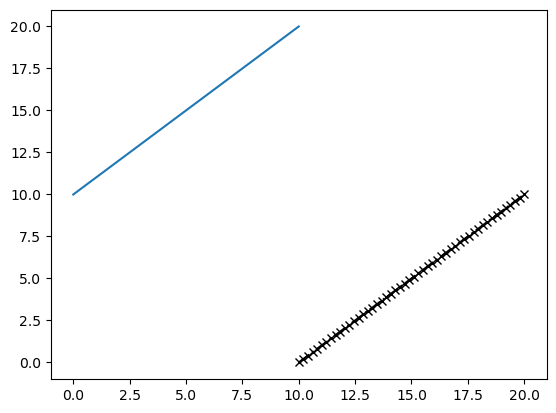

In [107]:
import matplotlib.pyplot as plt

plt.plot(B,C,C,B,'-.kx')
plt.show()